<a href="https://colab.research.google.com/github/IntroComputationalPhysics-UNT/kapitza-pendulum-Ms091704/blob/main/Copy_of_scratchpad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Psuedocode

1. Define the equation of motion that determines how the pendulum evolves in time.
2. Integrate the system for a given set of parameters
Choose the values of the dimensionless frequency, drive amplitude, and damping coefficient.
3. Extract a stability measure from the long-time data
4. Identify and mark the stable region
5. Produce the final visualization
Create a two-dimensional plot in which the horizontal axis represents the dimensionless frequency and the vertical axis represents the drive amplitude.

##import modules

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## define equation of motion


## Define our equation of motion for pivot-drive pendulum

The equation of motion is:
$$ \theta'' + 2 \zeta \theta' + \left(\epsilon^2 - \alpha cos\tau \right)sin\theta = 0$$

Putting this in the form needed by the solver `solve_ivp`gives,

$$ \theta'' = - 2 \zeta \theta' - \left(\epsilon^2 - \alpha cos\tau \right)sin\theta$$

Note that $f' = \frac{df}{d\tau}$ with $\tau=\omega_d t$, a dimensionless time.

In [31]:
##define equation of motion
def pivot_driven_pendulum_ode(tau, y, epsilon, alpha, zeta):
  """
  Tau:
    dimensionaless time : tau= omega_d*t
  y:ndarray
    state variable : [theta, ang_vel]
  alpha: float
    relaive displacement of the pivot to pendulum arm
  epsilon: float
    dimenstionaless frequency : epsilon = omega_0/omega_d
  zeta: float, optional
    dimensionless damping coefficient
  RETURNS:
    dy_dtau: ndarray
      time derivative of state variable
    """
  theta, ang_vel = y #unpacks state variable
  dtheta_dtau = ang_vel #defines the angular velocity
  d2theta_dtau2 = -2*zeta * dtheta_dtau- (epsilon**2 - alpha*np.cos(tau))*np.sin(theta) # equation of motion
  dy_dtau = [dtheta_dtau, d2theta_dtau2]
  return dy_dtau #return derivative

##define utilities
1. **`Basic plot`**
2. **`alpha_critical`** our guess for what the boundary of the inverterd state. parameters are `epsilon`, `zeta`, `coef`, returns `alpha`


In [32]:
def basic_plot(t,y,x_label=None, y_label=None, figsize=(3,3)):
  """
  The fuction plots a time series of data
  PARAMETERS:
  t : float, ndarray
     time
  y : float, ndarray
    data
  """
  plt.figure(figsize=figsize)
  plt.plot(t,y)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.show()


def alpha_critical (epsilon, zeta, coef): #defines the boundary of the inverted state
  """
  epsilon : float
    dimenstionaless frequency : epsilon = omega_0/omega_d
  zeta :float
    dimensionalles damping coeff
  coef : float
    tuning paremeter to help with fit
  RETURNS:
  alpha : float
    relaive displacement of the pivot to pendulum arm : alpha = y_0/l
  """
  alpha = coef*epsilon**2 #guess
  return alpha

##solve the equation of motion

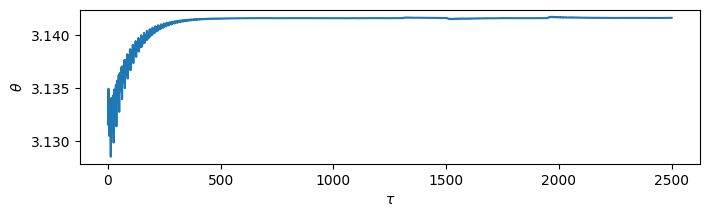

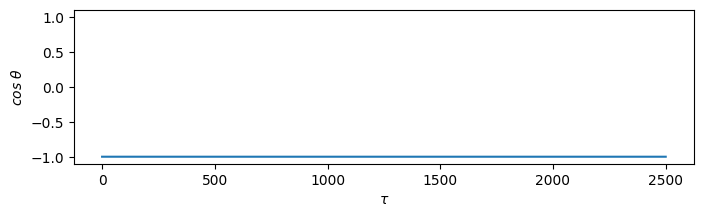

In [34]:
##parameters
epsilon= 0.2 #values less than one
alpha= 0.3  #values less than one
zeta= 0.1

#defien span of tau
tau_min=0
tau_max= n_decay/(2*zeta)
tau_span= [tau_min, tau_max]

#define an initial state
delta_theta= 0.01 #deviation of theta from pi/inverted state
theta_0 = np.pi - delta_theta
ang_vel_0=0
y_0= [theta_0, ang_vel_0]

  #solve
solution =solve_ivp(pivot_driven_pendulum_ode, tau_span, y_0, args=(epsilon, alpha, zeta), method = 'Radau', dense_output=True)
#number of damping times
n_decay=500

#plot tau
tau_plot= np.linspace(tau_min, tau_max, 1000)
theta_plot=solution.sol(tau_plot)[0]

#plot theta
plt.figure(figsize=(8,2))
plt.plot(tau_plot, theta_plot)
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\theta$')
#plt.ylim(-np.pi*1.1,np.pi*1.1)
plt.show()

#plot theta
plt.figure(figsize=(8,2))
plt.plot(tau_plot, np.cos(theta_plot))
plt.xlabel(r'$\tau$')
plt.ylabel(r'$cos\ \theta$')
plt.ylim(-1.1,1.1)
plt.show()

In [35]:
def average_long_timescale_response(epsilon, alpha, zeta, n_decay, delta_theta=0.01):
  #defien span of tau
  tau_min=0
  tau_max= n_decay/(2*zeta)
  tau_span= [tau_min, tau_max]

  #define an initial state
  delta_theta= 0.01 #deviation of theta from pi/inverted state
  theta_0 = np.pi - delta_theta
  ang_vel_0=0
  y_0= [theta_0, ang_vel_0]

  #solve
  solution =solve_ivp(pivot_driven_pendulum_ode, tau_span, y_0, args=(epsilon, alpha, zeta), method = 'Radau', dense_output=True)

  # calculate our measure of the long timescale response
  tau_averaging_range = np.linspace((n_decay-1)/(2*zeta), n_decay/(2*zeta), 1000)
  cos_theta_average = np.mean(np.cos(solution.sol(tau_averaging_range)[0]))

  return cos_theta_average, solution
# this function allowed us to look over a list of epsilon and alpha values to construct a contour plot

In [36]:
# defining the mesh
epsilon_list = np.linspace(0.01, 2, 30)
alpha_list = np.linspace(0,2,30)
zeta= 0.1

# initialize our mesh for the average long time scale response
cos_theta_mesh = np.zeros((len(alpha_list),len(epsilon_list)))
for i, alpha in enumerate(alpha_list):
  for j, epsilon in enumerate(epsilon_list):
    cos_theta_average, solution = average_long_timescale_response(epsilon, alpha, zeta, n_decay)
    cos_theta_mesh[i,j] = cos_theta_average

#creating the contour plot

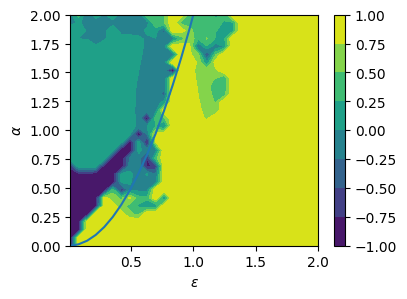

In [37]:
plt.figure(figsize=(4,3))
plt.contourf(epsilon_list, alpha_list, cos_theta_mesh)
plt.plot(epsilon_list, alpha_critical(epsilon_list, zeta, 2))
plt.ylabel(r'$\alpha$')
plt.xlabel(r'$\epsilon$')
plt.ylim(0,np.max(alpha_list))
plt.colorbar()
plt.show()

1. **Stability Criterion:**
To determine whether the inverted state is stable, I evaluated the long-time behavior of the angle relative to the inverted equilibrium at theta = pi
This measure reflects the typical size of the oscillations around the inverted state over long times.

2. **Choice of Numerical Parameters**
Time window:
The driving occurs at a dimensionless frequency, so the dynamics include very fast oscillations and very slow movements

3. **Functional Form for the Stability Boundary:**
I extracted the contour corresponding to the chosen stability.
This contour represents the numerical stability boundary. It fits the graph okay, not as spot on as i wouldve wanted/expected